Dataset: https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier

In [3]:
data = pd.read_csv("heart.csv")

In [4]:
data.shape

(303, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Cleaning

In [6]:
#Check the null value
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#Check for duplicates
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
#drop duplicates
data.drop_duplicates(inplace = True)

In [9]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
features = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

target = data['target']

## EDA

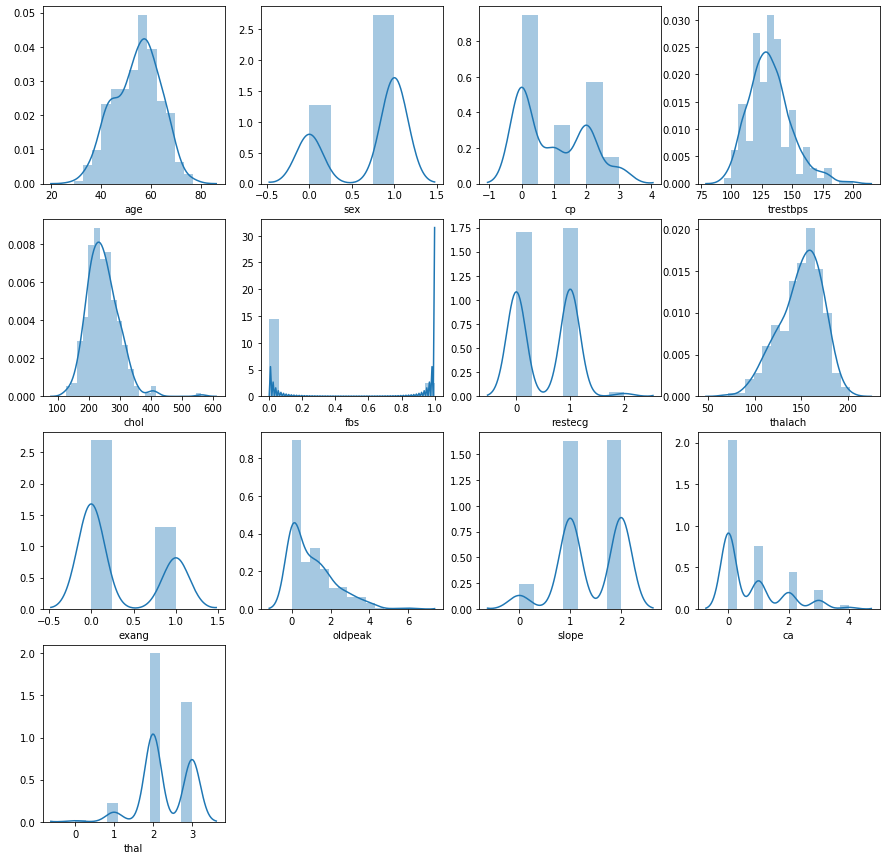

In [11]:
# create distplots
figure, ax = plt.subplots(nrows=4,ncols=4,figsize = (15,15))
for ind, column in enumerate(features.columns):
    sns.distplot(features[column],ax = ax[ind//4,ind%4])
    ax.flat[13].set_visible(False)
    ax.flat[14].set_visible(False)
    ax.flat[15].set_visible(False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021145CEE708>,
      dtype=object)

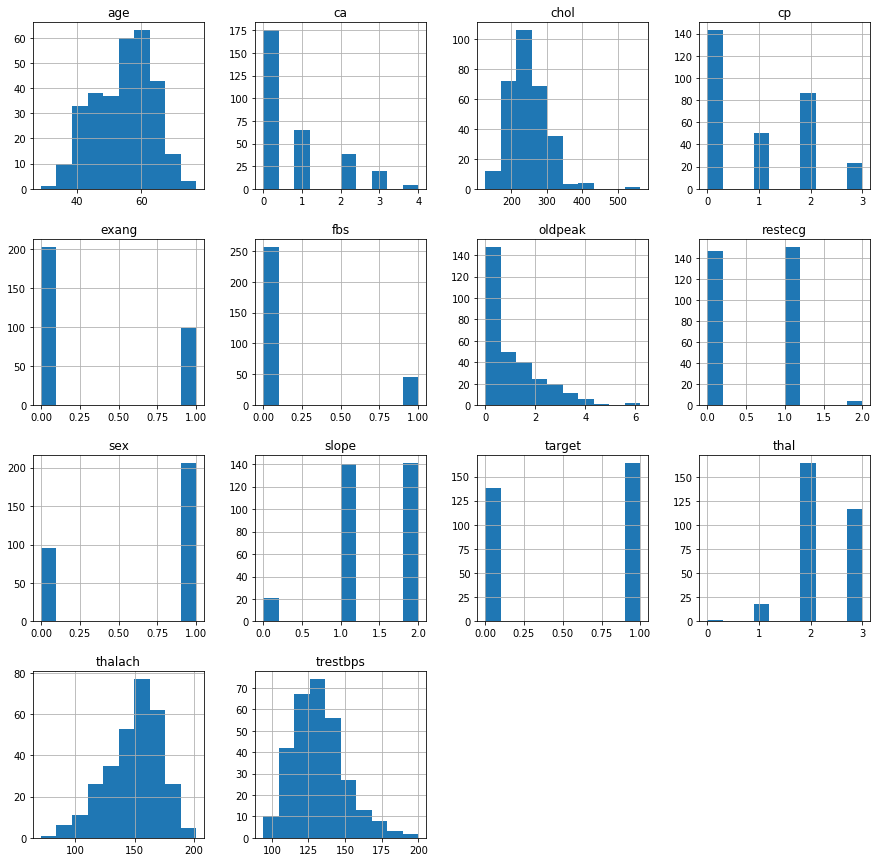

In [12]:
data.hist(figsize=(15,15))

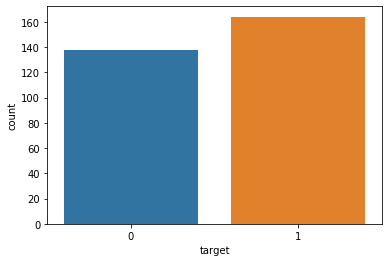

In [13]:
sns.countplot(data['target'])

## Data Preprocessing

In [14]:
#Create dummy columns for catagorical variables
df = pd.get_dummies(data,columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'],drop_first = True)

In [15]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [16]:
features = df.drop(['target'], axis = 1)

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(features)
X = pd.DataFrame(X,columns = features.columns)

In [18]:
y = df['target']

In [19]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,0.682656,-0.445435,-0.630990,3.482877,2.389793,...,-0.698344,-0.929622,-0.935829,-0.5237,-0.379393,-0.266312,-0.115857,3.972125,-1.097442,-0.795256
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,0.682656,-0.445435,1.584812,-0.287119,-0.418446,...,-0.698344,-0.929622,-0.935829,-0.5237,-0.379393,-0.266312,-0.115857,-0.251754,0.911210,-0.795256
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,-1.464866,2.244994,-0.630990,-0.287119,-0.418446,...,-0.698344,-0.929622,1.068571,-0.5237,-0.379393,-0.266312,-0.115857,-0.251754,0.911210,-0.795256
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,0.682656,2.244994,-0.630990,-0.287119,-0.418446,...,-0.698344,-0.929622,1.068571,-0.5237,-0.379393,-0.266312,-0.115857,-0.251754,0.911210,-0.795256
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,-1.464866,-0.445435,-0.630990,-0.287119,-0.418446,...,1.431958,-0.929622,1.068571,-0.5237,-0.379393,-0.266312,-0.115857,-0.251754,0.911210,-0.795256


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

#### KNN Classifier

In [21]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    scores=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(scores.mean())

In [22]:
print(knn_scores)

[0.7777419354838709, 0.7747311827956989, 0.8210752688172043, 0.7913978494623656, 0.8077419354838711, 0.804516129032258, 0.8178494623655915, 0.8245161290322581, 0.8344086021505376, 0.8378494623655914, 0.844516129032258, 0.8311827956989248, 0.8476344086021506, 0.8212903225806452, 0.8311827956989246, 0.8313978494623656, 0.8312903225806452, 0.8347311827956989, 0.8378494623655912, 0.8312903225806452]


Text(0, 0.5, 'score')

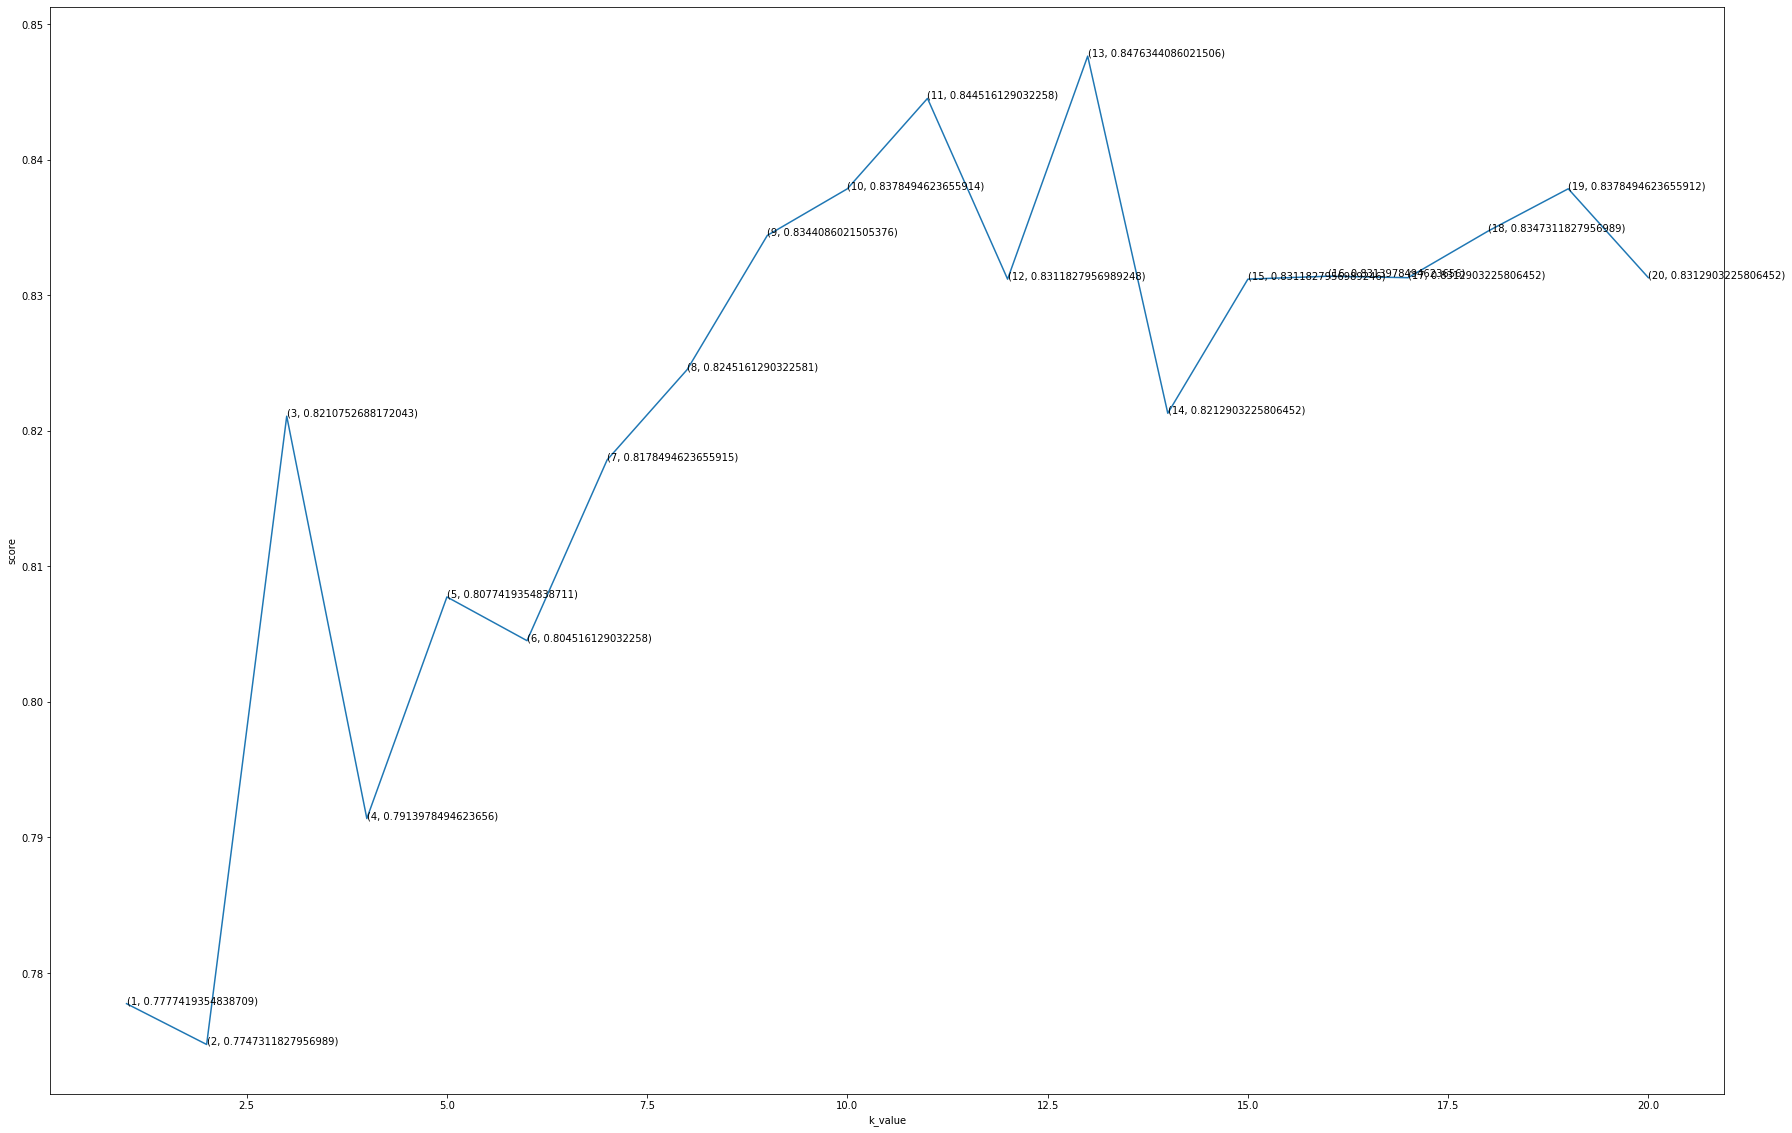

In [23]:
plt.figure(figsize=(30,20))

k_value = []
for k in range(1,21):
    k_value.append(k)
    
    
plt.plot(k_value,knn_scores) 

for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
    
plt.xlabel('k_value')
plt.ylabel('score')

In [24]:
knn_classifier = KNeighborsClassifier(n_neighbors = 13)

In [25]:
scores=cross_val_score(knn_classifier,X,y,cv=10)

In [26]:
scores.mean()

0.8476344086021506

#### Naive Bias Classifier

In [27]:
#We need to normalise the data using minmax scaler in order to use naive bias.

#### Decision Tree Classifier

In [28]:
decision_tree = DecisionTreeClassifier()
score=cross_val_score(decision_tree,X,y,cv=10)

In [29]:
score.mean()

0.7020430107526883

#### Random Forest Classifier

In [30]:
randomforest_classifier= RandomForestClassifier(n_estimators=13)
score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [31]:
score.mean()

0.7746236559139785

#### XGBoost Classifier

In [32]:
xgb_classifier= XGBRFClassifier()
scores=cross_val_score(xgb_classifier,X,y,cv=10)

In [33]:
scores.mean()

0.7813978494623656

##### Based on the cross validation scores we can see that the knn is the best model for this dataset.

## Final Model

In [34]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [35]:
knn_classifier = KNeighborsClassifier(n_neighbors=13)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [36]:
#Predicting the target
pred_knn = knn_classifier.predict(X_test)

In [37]:
#Confusion Matrix
confusion_matrix(y_test,pred_knn)

array([[36,  6],
       [ 8, 41]], dtype=int64)

In [38]:
accuracy = accuracy_score(y_test,pred_knn)
accuracy

0.8461538461538461

In [39]:
recall = recall_score(y_test,pred_knn)
recall

0.8367346938775511